# PROJET 4 : CONSOMMATION ELECTRIQUE DE BATIMENTS (Nettoyage et exploration)
*Mathieu GENTHON (avril-mai 2020)*

## SOMMAIRE<a class="anchor" id="sommaire"></a>
### 1 - [Contexte du projet](#1)<a class="anchor" id="sommaire"></a>
### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="sommaire"></a>
### 3 - [Description du Data Set](#3)<a class="anchor" id="sommaire"></a>
### 4 - [Nettoyage du Data Set](#4)<a class="anchor" id="sommaire"></a>
#### 4.1 - [Adresse](#41)<a class="anchor" id="sommaire"></a>
#### 4.2 - [Consolidation des deux dataframes](#42)<a class="anchor" id="sommaire"></a>
#### 4.3 - [Filtres et imputation de valeurs](#43)<a class="anchor" id="sommaire"></a>
### 5 - [Analyse exploratoire](#5)<a class="anchor" id="sommaire"></a>
#### 5.1 - [Matrice des corrélations](#51)<a class="anchor" id="sommaire"></a>
#### 5.2 - [Courbe de densité et skewness](#52)<a class="anchor" id="sommaire"></a>
#### 5.3 - [Dispersion des émissions de gaz en fonctions des variables qualitatives](#53)<a class="anchor" id="sommaire"></a>
### 6 - [Export dataframe](#6)<a class="anchor" id="sommaire"></a>
#### 6.1 - [Passage au logarithme et sélection des variables quantitatives pour Standard Scaler](#61)<a class="anchor" id="sommaire"></a>
#### 6.2 - [Encodage des variables qualitatives](#62)<a class="anchor" id="sommaire"></a>
#### 6.3 - [Création des jeux d'entrainements, de test et export](#63)<a class="anchor" id="sommaire"></a>

### 1 - [Contexte du projet](#1)<a class="anchor" id="1"></a>

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Problématique de la ville de Seattle

Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.
Votre mission :
- Réaliser une courte analyse exploratoire
- Tester différents modèles de prédiction pour répondre à la problématique

Quelques pistes, et erreurs à éviter :
L'objectif est de se passer des relevés de consommation annuels (attention à la fuite de données). Déduire des variables plus simples (nature et proportions des sources d'énergies utilisées) 
Faire attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).
Mettre en place une évaluation rigoureuse des performances de la régression et optimiser les hyperparamètres et le choix d'algorithme de ML à l'aide d'une validation croisée.

### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="2"></a>

In [552]:
# On importe les librairies dont on devrait avoir besoin pour le projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None) # On affiche toutes les colonnes des df
pd.options.display.max_rows = 100 # On affiche jusqu'à 100 lignes d'un df

In [553]:
# On charge les données depuis des fichiers en local et on crée des data frame pour chaque fichier.
path='C:/Users/GENTHON-M/Documents/formation/Open Classrooms/4-Consommation électrique de bâtiments/'
nrows = None
df_2015 = pd.read_csv(path+"2015-building-energy-benchmarking.csv", sep=',', nrows=nrows, low_memory=False, encoding='utf-8')
df_2016 = pd.read_csv(path+"2016-building-energy-benchmarking.csv", sep=',', nrows=nrows, low_memory=False, encoding='utf-8')
print( df_2015.shape , df_2016.shape )

(3340, 47) (3376, 46)


### 3 - [Description du data set](#3)<a class="anchor" id="3"></a>

**Clé primaire :**

In [554]:
# Recherche clé primaire du dataframe 2015 sans doublons
cle = ['OSEBuildingID']
df_2015[cle].drop_duplicates().shape[0] == df_2015.shape[0]

True

In [555]:
# Recherche clé primaire du dataframe 2016 sans doublons
cle = ['OSEBuildingID']
df_2016[cle].drop_duplicates().shape[0] == df_2016.shape[0]

True

La clé primaire des data set est OSEBuildingID

In [556]:
df_2015.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [557]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

**Différence de variables entre les deux data set :**

In [558]:
#On cherche les colonnes présentes dans df 2015 mais pas dans 2016
df_2015.columns.difference(df_2016.columns)

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [559]:
#On cherche les colonnes présentes dans df 2016 mais pas dans 2015
df_2016.columns.difference(df_2015.columns)

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

In [560]:
pd.options.display.max_colwidth = 200
df_2015['Location'][:3]

0    {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
1      {'latitude': '47.61310583', 'longitude': '-122.33335756', 'human_address': '{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
2     {'latitude': '47.61334897', 'longitude': '-122.33769944', 'human_address': '{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
Name: Location, dtype: object

- La variable Location dans df_2015 correspond aux variables Latitude, Longitude, State, ZipCode, Address et City.
- La variable Comment correspond à Comments
- Les variables 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)' correspondent aux variablesTotalGHGEmissions et GHGEmissionsIntensity
- Les variables '2010 Census Tracts', 'City Council Districts','OtherFuelUse(kBtu)', 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas','Zip Codes' ne semble pas avoir de correspondance



In [561]:
pd.options.display.max_colwidth = 50
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [562]:
df_2016.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


### 4 - [Nettoyage du data set](#4)<a class="anchor" id="4"></a>

#### 4.1 - [Adresse](#41)<a class="anchor" id="41"></a>

In [563]:
# On sépare la variable location en différentes variables pour être cohérente au df 2016
Adresse = df_2015['Location'].str.split(',',  expand= True)

#On enlève les caractères inutiles sur nos nouvelles variables
Adresse[0].replace("{'latitude': '","",regex=True,inplace=True)
Adresse[0].replace("'","",regex=True,inplace=True)

Adresse[1].replace("'longitude': '","",regex=True,inplace=True)
Adresse[1].replace("'","",regex=True,inplace=True)

Adresse[2].replace("'human_address':","",regex=True,inplace=True)
Adresse[2].replace("'","",regex=True,inplace=True)
Adresse[2].replace('{"address": "','',regex=True,inplace=True)
Adresse[2].replace('"','',regex=True,inplace=True)


Adresse[3].replace('"','',regex=True,inplace=True)
Adresse[3].replace('city: ','',regex=True,inplace=True)
Adresse[3].replace(' ','',regex=True,inplace=True)
Adresse[3] = Adresse[3].str.capitalize()

Adresse[4].replace('"state": "','',regex=True,inplace=True)
Adresse[4].replace('"','',regex=True,inplace=True)

Adresse[5].replace('"zip": "','',regex=True,inplace=True)
Adresse[5].replace('"}','',regex=True,inplace=True)
Adresse[5].replace("'}",'',regex=True,inplace=True)

Adresse.head(3)

,0,1,2,3,4,5
0,47.61219025,-122.33799744,405 OLIVE WAY,Seattle,WA,98101
1,47.61310583,-122.33335756,724 PINE ST,Seattle,WA,98101
2,47.61334897,-122.33769944,1900 5TH AVE,Seattle,WA,98101


In [564]:
# Conversion des variables latitude, longitude et Zip Code en float 64
Adresse[0] = pd.to_numeric(Adresse[0], errors='coerce')
Adresse[1] = pd.to_numeric(Adresse[1], errors='coerce')
Adresse[5] = pd.to_numeric(Adresse[5], errors='coerce')
Adresse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3340 non-null   float64
 1   1       3340 non-null   float64
 2   2       3340 non-null   object 
 3   3       3340 non-null   object 
 4   4       3340 non-null   object 
 5   5       3340 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 156.7+ KB


In [565]:
#ON réintègre notre adresse séparée en plusieurs champs dans notre df_2015 et on renomme les variables de gaz a effet de serre
df_2015['Latitude'] = Adresse[0]
df_2015['Longitude'] = Adresse[1]
df_2015['Address'] = Adresse[2]
df_2015['City'] = Adresse[3]
df_2015['State'] = Adresse[4]
df_2015['ZipCode'] = Adresse[5]

df_2015.drop(columns =["Location"], inplace = True) 

df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions', \
                        'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',\
                       'Comment':'Comments'}, inplace=True)
df_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219,-122.337997,405 OLIVE WAY,Seattle,WA,98101


#### 4.2 - [Consolidation des deux dataframes](#42)<a class="anchor" id="42"></a>

In [566]:
#On concatène nos 2 df.
df = pd.concat([df_2015, df_2016], axis=0, join='outer',ignore_index = True)
df.shape

(6716, 52)

In [567]:
#Suppression de variables non utiles
df.drop(['SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas','City Council Districts',\
        'Zip Codes','2010 Census Tracts'], axis='columns', inplace=True)
df.shape

(6716, 47)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

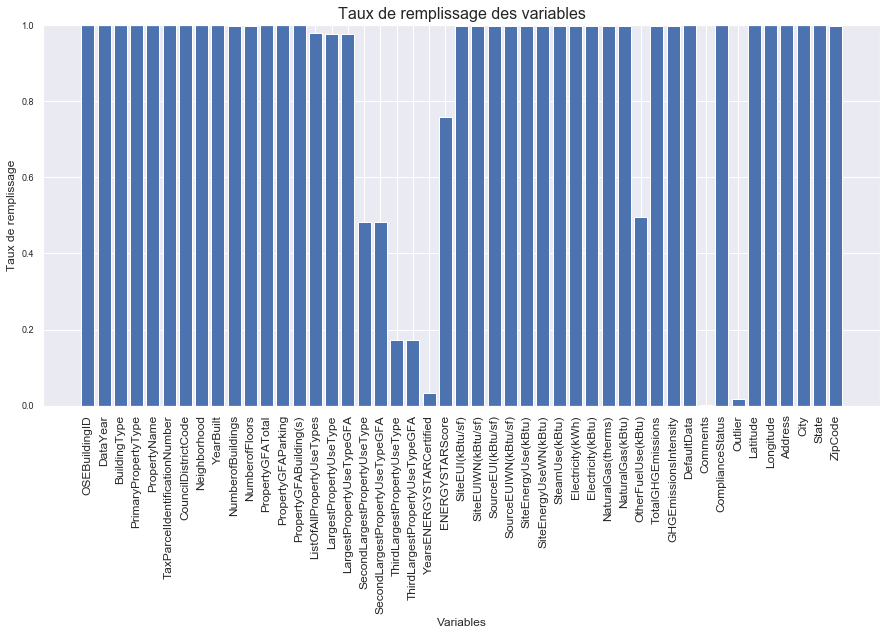

In [568]:
# Taux de remplissage des variables choisies
Taux_Remp = 1 - df.isna().sum()/len(df)
fig = plt.figure(figsize=(15,7))
axes = plt.axes()
axes.set_xlabel('Variables', fontsize = 12)
axes.set_ylabel('Taux de remplissage', fontsize = 12)
axes.set_ylim(0,1)
plt.title('Taux de remplissage des variables', fontsize = 16)
plt.bar(list(df),Taux_Remp)
plt.xticks(list(df),rotation=90,fontsize=12)
plt.yticks(fontsize=9)

In [569]:
#Reccupération des commentaires pour extraire de l'information sur les récentes rénovations
pd.options.display.max_colwidth = 600
Commentaire = df[['OSEBuildingID','DataYear','Comments']][df['Comments'].notna()]
Commentaire

,OSEBuildingID,DataYear,Comments
62,87,2015,Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.
436,594,2015,"Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com."
437,595,2015,One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs. Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re
595,792,2015,"Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu"
719,19694,2015,Construction completed in mid 2015. The building was unoccupied for most of 2015.
1358,21570,2015,Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1950 to 2016.
1360,21578,2015,Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1949 to 2016.
1373,21616,2015,Under construction starting 6/2015 (old building demolished) and ending 9/2017. New Building re-opens 9/2017. Year built changed from 1954 to 2017.
2108,24408,2015,Under construction starting 09/2014 (old building demolished) and ending 9/2017. New Buildings (two) re-open 9/2017. Year built changed from 1953 to 2017.
2230,24780,2015,"Part of McKinstry's campus, the office space for this building sites on the 3rd floor above a 2-story parking garage and is served by rooftop package units for both heating and cooling. Learn more at www.mckinstryinnovationcenter.com."


In [570]:
# Drop duplicate : On garde uniquement les données sur une année quand elles sont disponibles sur les deux années.
pd.options.display.max_colwidth = 50
df.drop_duplicates(subset = ['OSEBuildingID'], keep = 'last', inplace = True)
df.shape[0]

3432

In [571]:
# On Crée une variable où l'on notifie les bâtiments qui ont eu des travaux récents d'amélioriation de l'efficacité
df['RecentUpgrade'] = 'No'
#On sélectionne les index des batiments avec des travaux récents d'amélioration et on leur attribue la valeur Yes
Reno = df[(df['OSEBuildingID'] == 595) | (df['OSEBuildingID'] == 792) | (df['OSEBuildingID'] == 26240)].index.values
df.loc[Reno, 'RecentUpgrade'] = 'Yes'


In [572]:
# On uniformise l'écriture pour ne pas avoir de doublons.
df['Neighborhood'] = df['Neighborhood'].str.capitalize()
Delridge = df.index[df['Neighborhood']== 'Delridge neighborhoods'].tolist()
df.loc[Delridge, 'Neighborhood'] = 'Delridge'
df['Neighborhood'].nunique()

13

In [573]:
df.groupby('PrimaryPropertyType')['OSEBuildingID'].nunique()

PrimaryPropertyType
Distribution Center              53
High-Rise Multifamily           105
Hospital                         10
Hotel                            77
K-12 School                     141
Laboratory                       10
Large Office                    176
Low-Rise Multifamily           1009
Medical Office                   42
Mid-Rise Multifamily            568
Mixed Use Property              134
Non-Refrigerated Warehouse        2
Office                            3
Other                           263
Refrigerated Warehouse           12
Residence Hall                   23
Restaurant                       12
Restaurant\n                      1
Retail Store                     94
Self-Storage Facility            28
Senior Care Community            45
Small- and Mid-Sized Office     300
Supermarket / Grocery Store      40
University                       25
Warehouse                       187
Worship Facility                 72
Name: OSEBuildingID, dtype: int64

In [574]:
# On réduit le nombre de primary property type pour augmenter l'efficacité des algo de prédiction.
print(" nombre avant transformation : " , df['PrimaryPropertyType'].nunique()  )

Restau = df.index[df['PrimaryPropertyType']== 'Restaurant\n'].tolist()
df.loc[Restau, 'PrimaryPropertyType'] = 'Restaurant'

Warehouse = df.index[df['PrimaryPropertyType']== 'Non-Refrigerated Warehouse'].tolist()
df.loc[Warehouse, 'PrimaryPropertyType'] = 'Warehouse'

Office = df.index[(df['PrimaryPropertyType']== 'Large Office') | \
                  (df['PrimaryPropertyType']== 'Small- and Mid-Sized Office') ].tolist()
df.loc[Office, 'PrimaryPropertyType'] = 'Office'

print(" nombre après transformation : " ,df['PrimaryPropertyType'].nunique())

 nombre avant transformation :  26
 nombre après transformation :  22


In [575]:
# On réduit le nombre de building type pour augmenter l'efficacité des algo de prédiction.
NoRes = df.index[df['BuildingType']== 'Nonresidential WA'].tolist()
df.loc[NoRes, 'BuildingType'] = 'NonResidential'

In [576]:
# Filtre sur les habitation : Suite aux conseils du mentor, on ne prend pas en compte ce filtre car 
# cela élimine la moitié de nos individus.
# De plus, la ville doit prendre en compte tous les batiments pour atteindre son objectif de ville neutre en émissions
# de carbone en 2050
# No_Housing = (df['BuildingType'] != 'Multifamily HR (10+)') & (df['BuildingType'] != 'Multifamily LR (1-4)') & \
#            (df['BuildingType'] != 'Multifamily MR (5-9)')

#df = df[No_Housing] 

#### 4.3 - [Filtres et imputation de valeurs](#43)<a class="anchor" id="43"></a>

In [577]:
df.groupby('Outlier')['OSEBuildingID'].nunique()

Outlier
High outlier     9
Low Outlier      3
Low outlier     23
Name: OSEBuildingID, dtype: int64

In [578]:
#Filtre sur les Outlier
No_Outlier = (df['Outlier'] != 'High Outlier') & (df['Outlier'] != 'Low Outlier') & (df['Outlier'] != 'High outlier') &\
(df['Outlier'] != 'Low outlier')
df = df[No_Outlier]
df.shape

(3397, 48)

In [579]:
# Filtre de cohérence sur l'énergie en prenant en compte un arrondi pour ne pas éliminer trop d'individus.
df['OtherFuelUse(kBtu)'].fillna(0,inplace=True)
df['SteamUse(kBtu)'].fillna(0,inplace=True)
df['Electricity(kBtu)'].fillna(0,inplace=True)
df['NaturalGas(kBtu)'].fillna(0,inplace=True)
Check_Total_Energy =  (df['SiteEnergyUse(kBtu)'] - df['SteamUse(kBtu)'] - df['Electricity(kBtu)'] - \
                   df['NaturalGas(kBtu)'] - df['OtherFuelUse(kBtu)'])  < (0.001 * df['SiteEnergyUse(kBtu)'])
df = df[Check_Total_Energy]
Check_Electricity = df['Electricity(kBtu)'] != 0
df = df[Check_Electricity]
df.shape

(3341, 48)

In [580]:
df.groupby('ComplianceStatus')['OSEBuildingID'].nunique()

ComplianceStatus
Compliant                       3225
Error - Correct Default Data     109
Missing Data                       7
Name: OSEBuildingID, dtype: int64

In [581]:
#Filtre sur les entrées conformes
Compliant_Status = (df['ComplianceStatus'] == 'Compliant') 
df = df[Compliant_Status]
df.shape

(3225, 48)

In [582]:
# Nous pensons que la variable largestpropertyusetype peut être importante pour prédire la consommation
# et l'émission. Nous supprimons les lignes qui ne sont pas renseignés .
df.dropna(subset=['LargestPropertyUseType'],inplace=True)
df.shape

(3198, 48)

In [583]:
#Suppression de variables plus utiles
df.drop(['Outlier', 'ComplianceStatus','Comments','DefaultData'], axis='columns', inplace=True)
df.shape

(3198, 44)

In [584]:
#On remplit nos variables SecondLargestPropertyUseType(GFA) si nécessaire
Parking_filter = (df['PropertyGFAParking'] > 0) & (df['LargestPropertyUseType'] != 'Parking') & \
                (df['SecondLargestPropertyUseType'] != 'Parking') & (df['ThirdLargestPropertyUseType'] != 'Parking')
Loc_Parking_Empty = df[Parking_filter].index.values

df.loc[Loc_Parking_Empty, 'SecondLargestPropertyUseType'] = df.loc[Loc_Parking_Empty, 'SecondLargestPropertyUseType']\
.fillna('Parking')
df.loc[Loc_Parking_Empty, 'SecondLargestPropertyUseTypeGFA'] = df.loc[Loc_Parking_Empty, 'SecondLargestPropertyUseTypeGFA']\
.fillna(df.loc[Loc_Parking_Empty,'PropertyGFAParking'])

In [585]:
#On remplit nos variables SecondLargest et third largest
df['SecondLargestPropertyUseType'].fillna('No',inplace=True)
df['SecondLargestPropertyUseTypeGFA'].fillna(0,inplace=True)
df['ThirdLargestPropertyUseType'].fillna('No',inplace=True)
df['ThirdLargestPropertyUseTypeGFA'].fillna(0,inplace=True)
df['YearsENERGYSTARCertified'].fillna('No',inplace=True)

#### 4.4 - [Création de variables simplifiées](#44)<a class="anchor" id="44"></a>

In [586]:
# On Crée des variables de ratio d'énergie et de présence de sources d'énergies
df['RatioElec'] = df['Electricity(kBtu)']/df['SiteEnergyUse(kBtu)']
df['RatioSteam'] = df['SteamUse(kBtu)']/df['SiteEnergyUse(kBtu)']
df['RatioGas'] = df['NaturalGas(kBtu)']/df['SiteEnergyUse(kBtu)']

df['UseElec'] = 0
UseElec = df[(df['Electricity(kBtu)'] > 0)].index.values
df.loc[UseElec, 'UseElec'] = 1

df['UseSteam'] = 0
UseSteam = df[(df['SteamUse(kBtu)'] > 0)].index.values
df.loc[UseSteam, 'UseSteam'] = 1

df['UseGas'] = 0
UseGas = df[(df['NaturalGas(kBtu)'] > 0)].index.values
df.loc[UseGas, 'UseGas'] = 1


In [588]:
df.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,City,State,ZipCode,RecentUpgrade,RatioElec,RatioSteam,RatioGas,UseElec,UseSteam,UseGas
47,61,2015,Multifamily LR (1-4),Low-Rise Multifamily,GATEWOOD APTS,1975700600,7,Downtown,1900,1.0,4.0,48383,0,48383,"Multifamily Housing, Retail Store",Multifamily Housing,38172.0,Retail Store,10211.0,No,0.0,No,75.0,61.0,69.9,129.6,139.4,2953338.0,3379678.0,915977.0,424619.0,1448859.0,5886.0,588563.0,0.0,112.06,2.19,47.609736,-122.340384,107 PINE ST,Seattle,WA,98101.0,No,0.490584,0.31015,0.199287,1,1,1
165,266,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEST SEATTLE COMM. RESOURCE CENTER/FOOD BANK A...,9271000000,1,Delridge,2007,1.0,4.0,52134,0,52134,Multifamily Housing,Multifamily Housing,52134.0,No,0.0,No,0.0,No,85.0,23.3,26.3,73.0,82.5,1212551.0,1369895.0,0.0,355378.0,1212601.0,0.0,0.0,0.0,8.45,0.06,47.544238,-122.376171,6500 35TH AVE SW,Seattle,WA,98126.0,No,1.000041,0.00000,0.000000,1,0,0


### 5 - [Analyse exploratoire](#5)<a class="anchor" id="5"></a>

#### 5.1 - [Matrice des corrélations](#51)<a class="anchor" id="51"></a>

In [590]:
df_matCor = df.loc[:,['Latitude','Longitude',\
                      'YearBuilt','NumberofBuildings','NumberofFloors',\
                      'PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA',\
                      'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',\
                      'ENERGYSTARScore','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',\
                      'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kWh)',\
                      'Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)',\
                      'TotalGHGEmissions','GHGEmissionsIntensity']]
df_matCor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 47 to 6715
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Latitude                         3198 non-null   float64
 1   Longitude                        3198 non-null   float64
 2   YearBuilt                        3198 non-null   int64  
 3   NumberofBuildings                3198 non-null   float64
 4   NumberofFloors                   3198 non-null   float64
 5   PropertyGFATotal                 3198 non-null   int64  
 6   PropertyGFAParking               3198 non-null   int64  
 7   PropertyGFABuilding(s)           3198 non-null   int64  
 8   LargestPropertyUseTypeGFA        3198 non-null   float64
 9   SecondLargestPropertyUseTypeGFA  3198 non-null   float64
 10  ThirdLargestPropertyUseTypeGFA   3198 non-null   float64
 11  ENERGYSTARScore                  2401 non-null   float64
 12  SiteEUI(kBtu/sf)   

In [591]:
# Heatmap des corrélations
def correlations(df, largeur=14, hauteur=14):

    # Table des corrélations
    corr = df.corr()

    # Add the mask to the heatmap
    plt.figure(figsize=(largeur,hauteur))

    sns.heatmap(corr, center=0, cmap=sns.color_palette("coolwarm", 7), linewidths=0.5, 
            annot=True, annot_kws={"size":9}, fmt=".02f",square=True)

    plt.title('Matrice des corrélations', fontsize=18)
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.show()

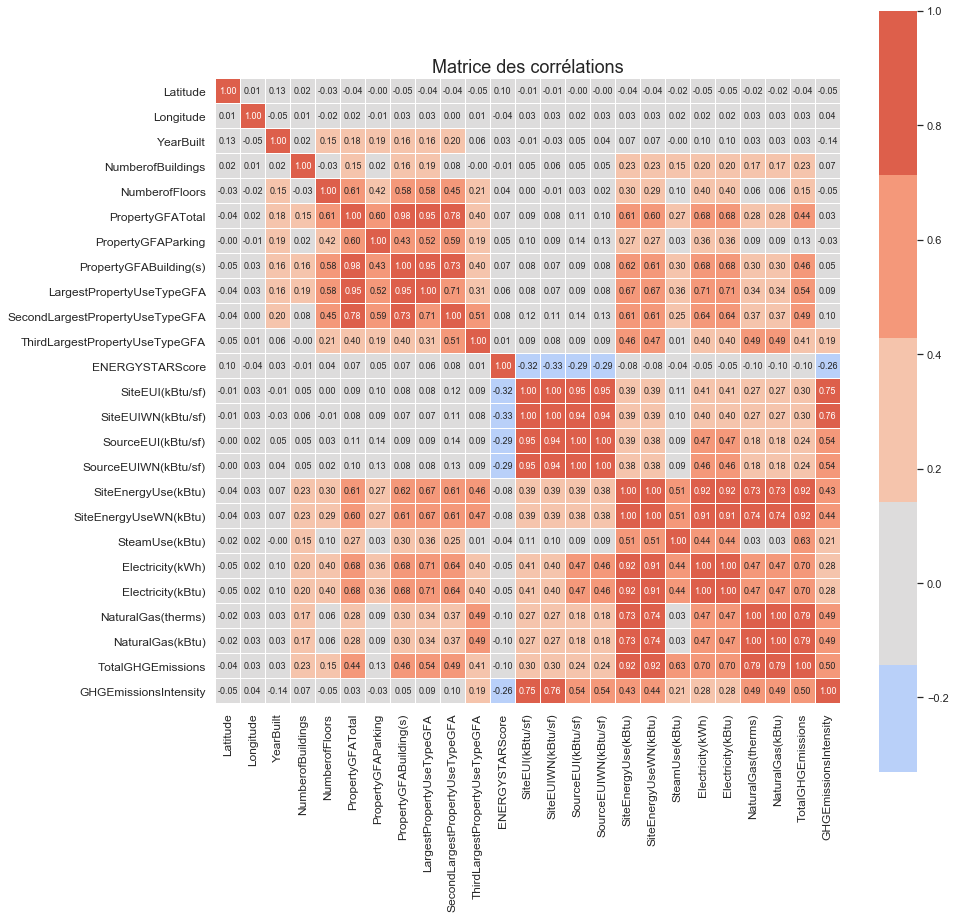

In [592]:
correlations(df_matCor)

La latitude et la longitude ne sont pas corrélés aux autres variables, ce qui semble logique au premier abord.
On enlève une sur les 2 variables identiques (conversion unité ou conversion Weahter Normalized)
On garde YearBuilt, NumberofFloors, PropertyGFABuilding(s), PropertyGFAParking,ENERGYSTARScore, SiteEUI(kBtu/sf),SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu),TotalGHGEmissions, GHGEmssionsIntensity.


#### 5.2 - [Courbe de densité et skewness](#52)<a class="anchor" id="52"></a>

In [593]:
Variables = ['YearBuilt', 'NumberofFloors', 'PropertyGFABuilding(s)','PropertyGFAParking',\
             'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',\
             'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',\
              'SiteEnergyUse(kBtu)',\
                'Electricity(kBtu)', 'SteamUse(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity']
X = df.loc[:,Variables].copy()
X_tab = X.values
X.shape


(3198, 15)

In [594]:
for var in X.columns.values:
    subset = X[var]
    print("-"*20)
    print(var)
    print("moyenne:\n",subset.mean())
    print("variance:\n",subset.var(ddof=0))
    print("ecart-type:\n",subset.std(ddof=0))
    print("skewness:\n",subset.skew())
  

--------------------
YearBuilt
moyenne:
 1968.5606629143215
variance:
 1102.1656445886808
ecart-type:
 33.19888017070276
skewness:
 -0.5410250883334496
--------------------
NumberofFloors
moyenne:
 4.793621013133208
variance:
 30.90362409902021
ecart-type:
 5.5591028142156365
skewness:
 5.890659338352947
--------------------
PropertyGFABuilding(s)
moyenne:
 83951.3492808005
variance:
 18083092609.81891
ecart-type:
 134473.38996923855
skewness:
 6.253135008780975
--------------------
PropertyGFAParking
moyenne:
 8592.303314571607
variance:
 1153797447.9041784
ecart-type:
 33967.594084718134
skewness:
 6.487189106786613
--------------------
LargestPropertyUseTypeGFA
moyenne:
 76378.85209505941
variance:
 15659776568.681952
ecart-type:
 125139.02895852257
skewness:
 6.187128302421671
--------------------
SecondLargestPropertyUseTypeGFA
moyenne:
 15895.20053060663
variance:
 1740952466.961251
ecart-type:
 41724.722491123306
skewness:
 5.7462208950909615
--------------------
ThirdLargestPro

In [595]:
# Grille des courbes de densité
def densite(df, lines=5, cols=3):
    """
    Input : dataframe, lignes, colonnes
    Output : grille des courbes de densités des variables numériques du dataframe
    """
    df = df.select_dtypes(include='number').copy()
   
    fig, ax = plt.subplots(lines, cols, figsize=(min(15,cols*3),lines*2))

    for i,val in enumerate(df.columns.tolist()):
        bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i%cols], kde_kws={'bw':0.1})
        bp.set_title("skewness : "+str(round(df[val].skew(),1)), fontsize=12)
        bp.set_yticks([])
        imax = i

    for i in range(imax+1,lines*cols):
        ax[i//cols, i%cols].axis('off')
   
    plt.tight_layout()
    plt.show()   

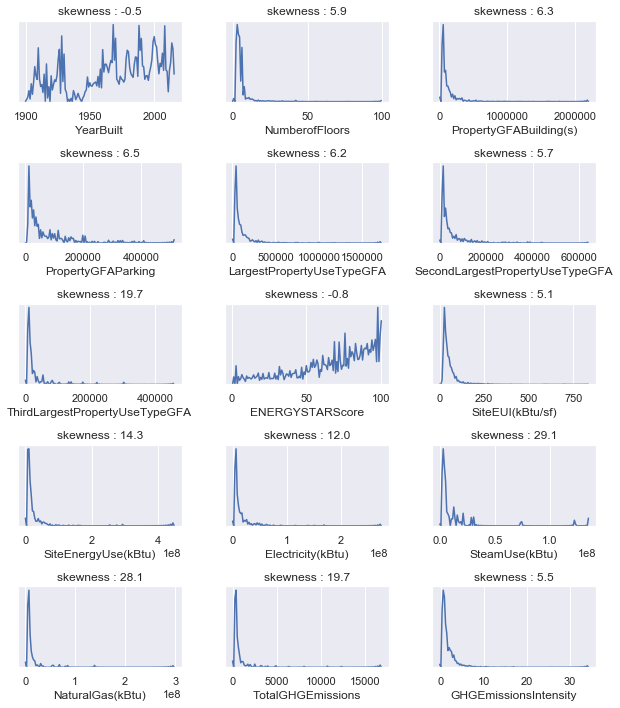

In [596]:
densite(X)

#### 5.3 - [Dispersion des émissions de gaz en fonctions des variables qualitatives](#53)<a class="anchor" id="53"></a>

In [597]:
df.nunique()

OSEBuildingID                      3198
DataYear                              2
BuildingType                          7
PrimaryPropertyType                  22
PropertyName                       3185
TaxParcelIdentificationNumber      3102
CouncilDistrictCode                   7
Neighborhood                         13
YearBuilt                           113
NumberofBuildings                    16
NumberofFloors                       50
PropertyGFATotal                   3028
PropertyGFAParking                  492
PropertyGFABuilding(s)             3024
ListOfAllPropertyUseTypes           461
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          2979
SecondLargestPropertyUseType         51
SecondLargestPropertyUseTypeGFA    1431
ThirdLargestPropertyUseType          45
ThirdLargestPropertyUseTypeGFA      497
YearsENERGYSTARCertified             66
ENERGYSTARScore                     100
SiteEUI(kBtu/sf)                   1086
SiteEUIWN(kBtu/sf)                 1109


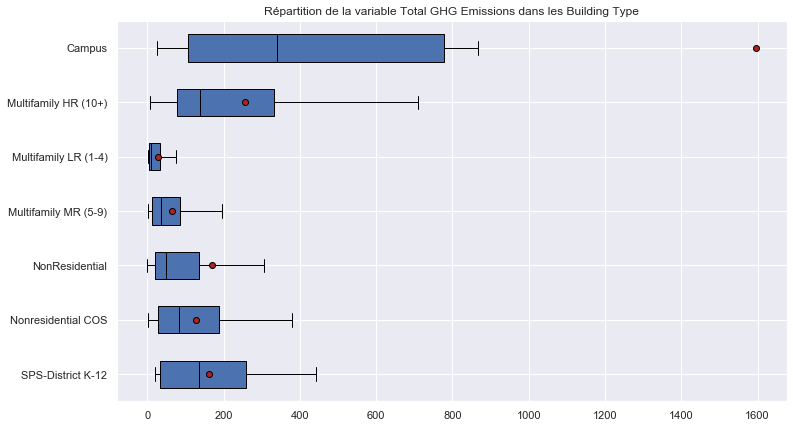

In [598]:
X = "BuildingType" # qualitative
Y = "TotalGHGEmissions" # quantitative

sous_echantillon = df[[X,Y]].copy() 
modalites = df[X].unique()
mod= sorted(modalites,reverse=True)
groupes = []
for m in mod:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(12,7))
plt.boxplot(groupes, labels=mod, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de la variable Total GHG Emissions dans les Building Type')
plt.show()

In [599]:
df.groupby('BuildingType')['OSEBuildingID'].nunique()

BuildingType
Campus                    24
Multifamily HR (10+)     105
Multifamily LR (1-4)     982
Multifamily MR (5-9)     568
NonResidential          1437
Nonresidential COS        72
SPS-District K-12         10
Name: OSEBuildingID, dtype: int64

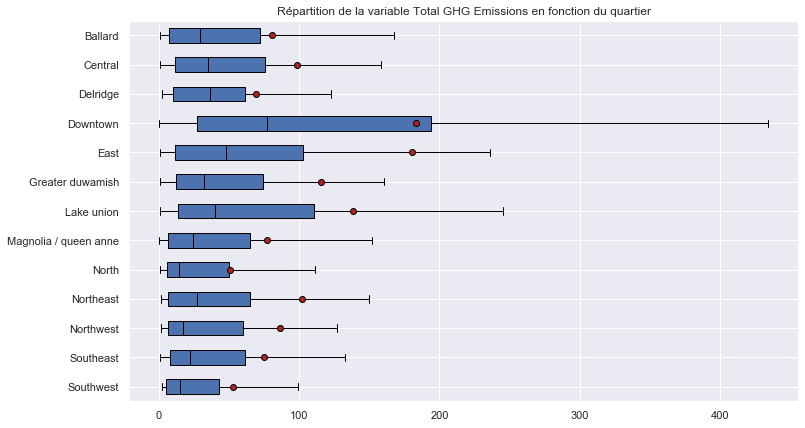

In [600]:
X = "Neighborhood" # qualitative
Y = "TotalGHGEmissions" # quantitative

sous_echantillon = df[[X,Y]].copy() 
modalites = df[X].unique()
mod= sorted(modalites,reverse=True)
groupes = []
for m in mod:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(12,7))
plt.boxplot(groupes, labels=mod, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de la variable Total GHG Emissions en fonction du quartier')
plt.show()

In [601]:
df.groupby('Neighborhood')['OSEBuildingID'].nunique()

Neighborhood
Ballard                  125
Central                  117
Delridge                  76
Downtown                 555
East                     441
Greater duwamish         357
Lake union               242
Magnolia / queen anne    409
North                    179
Northeast                261
Northwest                211
Southeast                 79
Southwest                146
Name: OSEBuildingID, dtype: int64

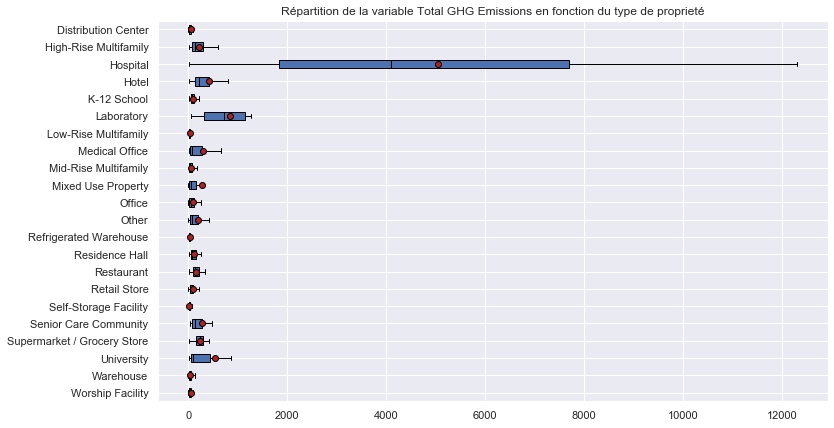

In [602]:
X = "PrimaryPropertyType" # qualitative
Y = "TotalGHGEmissions" # quantitative

sous_echantillon = df[[X,Y]].copy() 
modalites = df[X].unique()
mod= sorted(modalites,reverse=True)
groupes = []
for m in mod:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(12,7))
plt.boxplot(groupes, labels=mod, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de la variable Total GHG Emissions en fonction du type de proprieté')
plt.show()

In [603]:
df.groupby('PrimaryPropertyType')['OSEBuildingID'].nunique()

PrimaryPropertyType
Distribution Center             53
High-Rise Multifamily          100
Hospital                        10
Hotel                           75
K-12 School                     50
Laboratory                      10
Low-Rise Multifamily           954
Medical Office                  42
Mid-Rise Multifamily           551
Mixed Use Property             131
Office                         459
Other                          246
Refrigerated Warehouse          12
Residence Hall                  23
Restaurant                      11
Retail Store                    85
Self-Storage Facility           27
Senior Care Community           43
Supermarket / Grocery Store     39
University                      22
Warehouse                      186
Worship Facility                69
Name: OSEBuildingID, dtype: int64

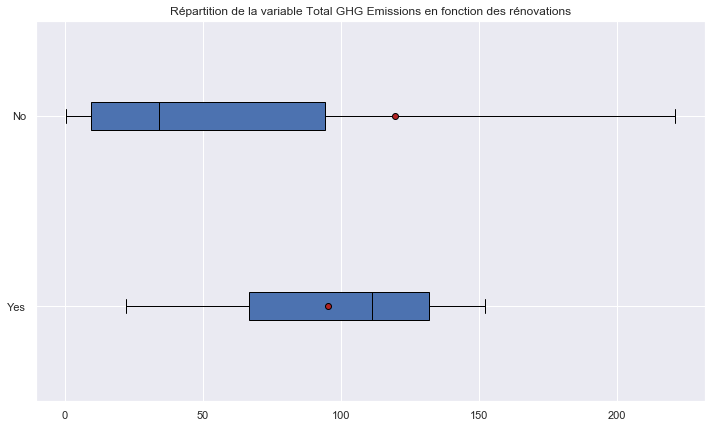

In [604]:
X = "RecentUpgrade" # qualitative
Y = "TotalGHGEmissions" # quantitative

sous_echantillon = df[[X,Y]].copy() 
modalites = df[X].unique()
mod= sorted(modalites,reverse=True)
groupes = []
for m in mod:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(12,7))
plt.boxplot(groupes, labels=mod, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Répartition de la variable Total GHG Emissions en fonction des rénovations')
plt.show()

### 6 - [Sélection des variables et export dataframe](#6)<a class="anchor" id="6"></a>

#### 6.1 - [Passage au logarithme et sélection des variables quantitatives pour le Standard Scaler](#61)<a class="anchor" id="61"></a>

In [605]:
#On isole les variables avec un coefficient de skewness élevé (>2) pour les passer au log.
VarToLog = ['NumberofFloors', 'PropertyGFABuilding(s)','PropertyGFAParking',\
             'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',\
             'SiteEUI(kBtu/sf)','SiteEnergyUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','SteamUse(kBtu)',\
            'TotalGHGEmissions', 'GHGEmissionsIntensity']
#
OtherVar = ['YearBuilt','ENERGYSTARScore','RatioElec','RatioSteam','RatioGas']

df_other = df.loc[:,OtherVar].copy()

df_log = np.log10(df.loc[:,VarToLog]+1).copy()

print(df_log.shape, df_other.shape)

df_var1 = pd.concat([df_other, df_log], axis=1, join='outer')
df_var1.head()

(3198, 13) (3198, 5)


,YearBuilt,ENERGYSTARScore,RatioElec,RatioSteam,RatioGas,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
47,1900,75.0,0.490584,0.31015,0.199287,0.698970,4.684702,0.000000,4.581756,4.009111,0.000000,1.792392,6.470313,6.161026,5.769794,5.961885,2.053309,0.503791
165,2007,85.0,1.000041,0.00000,0.000000,0.698970,4.717129,0.000000,4.717129,0.000000,0.000000,1.385606,6.083700,6.083718,0.000000,0.000000,0.975432,0.025306
272,1906,45.0,0.994235,0.00000,0.005807,0.845098,4.860044,4.413652,4.992867,4.413652,0.000000,1.828015,6.814640,6.812128,4.578570,0.000000,1.683407,0.079181
312,1947,59.0,1.000042,0.00000,0.000000,0.698970,5.192944,4.578123,5.141992,4.677059,4.047937,2.028571,7.224280,7.224298,0.000000,0.000000,2.071293,0.089905
358,2008,76.0,0.499040,0.00000,0.500981,0.602060,4.741853,4.330637,4.741853,4.330637,0.000000,1.914343,6.650987,6.349122,6.350808,0.000000,2.132548,0.419956


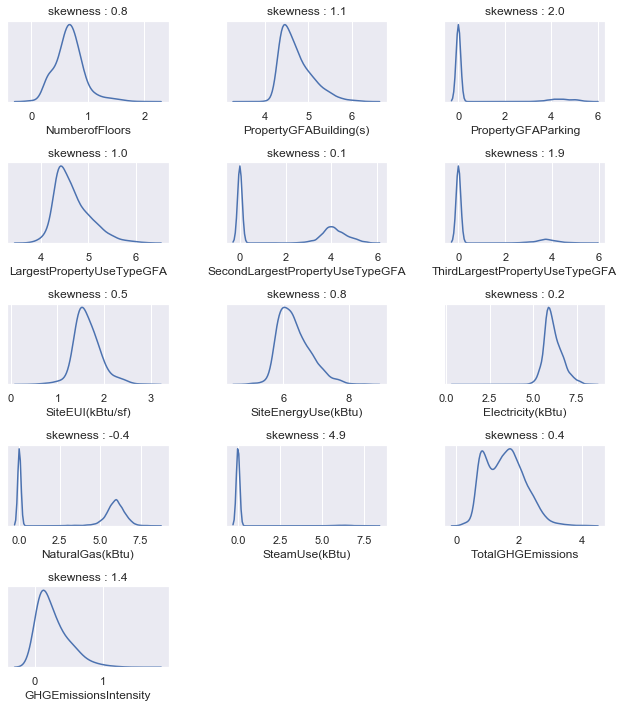

In [606]:
densite(df_log)

In [608]:
df_targ = df_var1.loc[:,['SiteEnergyUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','SteamUse(kBtu)',\
                         'TotalGHGEmissions',\
                         'SiteEUI(kBtu/sf)','GHGEmissionsIntensity']].copy()

df_var1.drop(['SiteEnergyUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','SteamUse(kBtu)',\
              'SiteEUI(kBtu/sf)','TotalGHGEmissions','GHGEmissionsIntensity'], axis='columns', inplace=True)

features_to_StdScl = df_var1.columns

print(df_targ.shape)

(3198, 7)


#### 6.2 - [Encodage des variables qualitatives](#62)<a class="anchor" id="62"></a>

In [610]:
#Solution 2 pour encoder avec Label encoder. Plus propre et rapide. Au final, non utilisé car on utilise 
# un one hot encoder
var_input_to_le = ['BuildingType','PrimaryPropertyType','Neighborhood','RecentUpgrade']
df_var_quali = df.loc[:,var_input_to_le].copy()
# Import LabelEncoder and creating labelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
table_enc = []

# Converting string labels into numbers.
for var in var_input_to_le:
    df_var_quali[var] = le.fit_transform(df.loc[:,var])

In [611]:
# Encodage des nouvelles features avec le one hot encoder
var_input_to_ohe = ['BuildingType','PrimaryPropertyType','Neighborhood','RecentUpgrade']
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

new_features_names = pd.get_dummies(df[var_input_to_ohe]).columns.tolist()

encoded = pd.DataFrame(encoder.fit_transform(df[var_input_to_ohe]), columns=new_features_names)
encoded.index = df.index

encoded

,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,Neighborhood_Northwest,Neighborhood_Southeast,Neighborhood_Southwest,RecentUpgrade_No,RecentUpgrade_Yes
47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
165,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
272,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
358,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6713,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [612]:
Already_Encoded = ['UseElec','UseSteam','UseGas']

al_encoded = df.loc[:,Already_Encoded].copy()

#### 6.3 - [Création des jeux d'entrainements, de test et export](#63)<a class="anchor" id="63"></a>

In [613]:
df_std = pd.concat([encoded,al_encoded,df_var1,df_targ], axis=1, join='outer')
df_std.shape

(3198, 65)

In [614]:
from sklearn import model_selection
df_std_train, df_std_test = model_selection.train_test_split(df_std , test_size=0.3, random_state = 9 )

In [615]:
df_std_train = pd.DataFrame(df_std_train)
df_std_test = pd.DataFrame(df_std_test)

In [618]:
# On centre et on réduit nos variables d'entrée qualitative. On le fait après le split car 
# les données test auraient influencé l'opération de centrage-réduction sur les données d'entrainement.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df_std_train[features_to_StdScl] = scaler.fit_transform(df_std_train[features_to_StdScl])
df_std_test[features_to_StdScl] = scaler.fit_transform(df_std_test[features_to_StdScl])

In [619]:
df_std_train.to_csv(path+"df_std_train.csv",index=False, sep=',', encoding='utf-8')
df_std_test.to_csv(path+"df_std_test.csv",index=False, sep=',', encoding='utf-8')

print( df_std_train.shape,df_std_test.shape)

(2238, 65) (960, 65)
